In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data_df=pd.read_csv('C:\\Users\\madhu\\Desktop\\ACM\\Movie recommendation system\\5000 movies dataset.zip')

In [3]:
data_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
data_df=data_df[['id','title','genres']]

In [5]:
import ast

# Function to extract unique genre names from the genre dictionaries
def extract_unique_genre_names(genre_list):
    genres = ast.literal_eval(genre_list)
    unique_genres = set(genre['name'] for genre in genres)
    return list(unique_genres)
    
# Apply the function to the 'genres' column
data_df['genres'] = data_df['genres'].apply(extract_unique_genre_names)


In [6]:
# Split the genres into individual genres and one-hot encode them
genres_df = data_df['genres'].str.join('|').str.get_dummies()

# Combine the original dataframe with the one-hot encoded genres dataframe
data_df = pd.concat([data_df, genres_df], axis=1)

# Drop the original 'genres' column as it's now redundant
data_df.drop(columns=['genres'], inplace=True)


In [7]:
data_df.to_csv(r'C:\\Users\\madhu\\Desktop\\ACM\\Movie recommendation system\\preprocessed_5000_movies.csv', index=False)


In [8]:
features = data_df.drop(['title', 'id'], axis=1)

In [9]:
target_variable=data_df['title']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4687,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2951,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4071,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4579,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2197,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [12]:
X_test.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
596,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3372,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2702,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2473,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train.head()

4687                          Good Dick
2951                Inside Llewyn Davis
4071              From Russia with Love
4579    Monty Python and the Holy Grail
2197                What's Your Number?
Name: title, dtype: object

C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\clust

[9163.48906933167, 7796.996585740252, 6773.413705343329, 6183.293295018972, 5832.083881815846, 5347.825097927719, 5112.069274922865, 4798.377288935025, 4560.789410473068, 4437.060811466963]


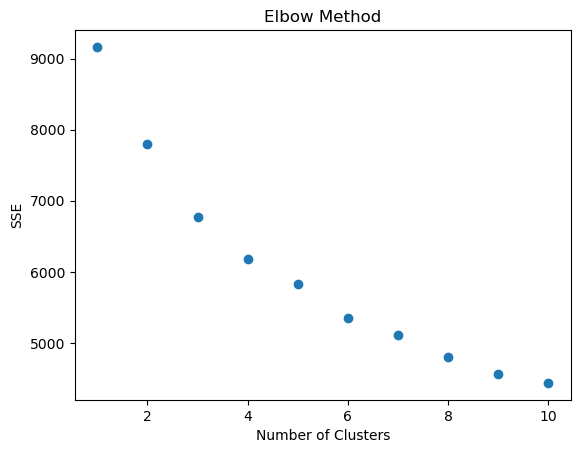

In [94]:
# Determine the number of clusters using Elbow Method (optional)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
print(sse)
plt.scatter(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [14]:
# Choose the number of clusters (K)
k = 4  # This is an example, use the Elbow Method plot to decide

# Fit K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Add the cluster labels to the original DataFrame
data_df['Cluster'] = kmeans.labels_


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
data_df.head()

,id,title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Cluster
0,19995,Avatar,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1,285,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,206647,Spectre,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,49026,The Dark Knight Rises,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,49529,John Carter,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3


In [16]:
def recommend_movies(movie_title, data_df, num_recommendations=5):
    # Find the cluster for the given movie_id
    movie_cluster = data_df.loc[data_df['title'] == movie_title, 'Cluster'].values[0]
    
    # Find other movies in the same cluster
    similar_movies = data_df[data_df['Cluster'] == movie_cluster]
    
    # Exclude the movie itself from the recommendations
    similar_movies = similar_movies[similar_movies['title'] != movie_title]
    
    # Return the top N recommendations
    return similar_movies.head(num_recommendations)




In [18]:
# Assuming your DataFrame is named data_df
# Specify the movie ID for which you want to find similar movies
movie_title = input("Enter a movie title: ")

# Call the recommend_movies function
recommended_movies = recommend_movies(movie_title, data_df)

# Print the recommended movies
print(recommended_movies['title'])


Enter a movie title:  The Dark Knight Rises


25                           Titanic
45                       World War Z
58                       Rush Hour 3
65                   The Dark Knight
82    Dawn of the Planet of the Apes
Name: title, dtype: object
